<a href="https://colab.research.google.com/github/vpagonis/Python-Codes/blob/main/Ch11PagonisGitHub/REC9IR50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

FOM= 8.28  %
+---+------+---------+--------+----------+-----+-------+
| A |  dA  |   rho   | d(rho) | s'(s^-1) | ds' |  bgd  |
+---+------+---------+--------+----------+-----+-------+
| 1 | 0.02 | 0.00642 | 8e-05  |  12.08   | 0.1 | 0.008 |
+---+------+---------+--------+----------+-----+-------+


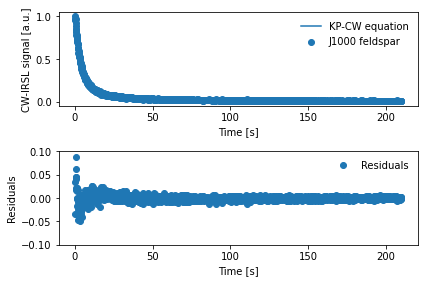

In [1]:
# J1000 CW-IRSL data fitted with KP-CW equation
from scipy import optimize
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable 
import warnings
warnings.filterwarnings("ignore")
import requests

url='https://github.com/vpagonis/Python-Codes/raw/main/Ch11PagonisGitHub/rec%239IR50.TXT'

response=requests.get(url)
a=response.text
b=np.array(list(map(float,a.strip("[]").split())))
data=b.reshape(-1,2)

x_data,y_data = data[:, 0], data[:, 1] 

x_data,y_data=data[:,0][2:len(x_data)], data[:,1][2:len(x_data)]
y_data=y_data/max(y_data)
plt.subplot(2,1, 1)
def test_func(x, imax_fit,rho_fit, A_fit,bgd_fit):
    return imax_fit*np.exp (-rho_fit*(np.log(1 + A_fit*x))\
	** 3.0)*(np.log(1+A_fit*x)**2.0)/(1+x*A_fit)+bgd_fit
params, cov = optimize.curve_fit(test_func,\
x_data, y_data)
drho= round(np.sqrt(cov[1][1]),5)
dA = round(np.sqrt(cov[2][2]),2)
dimax = round(np.sqrt(cov[0][2]),2)
plt.scatter(x_data, y_data, label='J1000 feldspar')
plt.plot(x_data, test_func(x_data, *params[0:4]),
label='KP-CW equation')
leg = plt.legend()
leg.get_frame().set_linewidth(0.0)
plt.ylabel('CW-IRSL signal [a.u.]')
plt.xlabel('Time [s]')
plt.subplot(2,1, 2)
plt.plot(x_data,test_func(x_data, *params[0:4])-\
y_data,"o",label='Residuals')
leg = plt.legend()
leg.get_frame().set_linewidth(0.0)
plt.ylabel('Residuals')
plt.xlabel('Time [s]')
plt.ylim(-.1,.1)
plt.tight_layout()
imax,rho, A, bgd=int(params[0]),round(params[1],5),\
round(params[2],2),round(params[-1],3)
res=test_func(x_data, *params)-y_data
FOM=round(100*np.sum(abs(res))/np.sum(y_data),2)
myTable=PrettyTable(["A",'dA', "rho",  "d(rho)",\
"s'(s^-1)","ds'",'bgd'])  
myTable.add_row([imax,dimax,rho,drho, A, dA,bgd])
print('FOM=',FOM,' %')
print(myTable)
plt.show()